# 連續變數特徵工程

本作業將請學員完成以下要求：
1. 請至 Kaggle 平台找尋欲探索的資料集，進行本次作業。
2. 請執行至少兩種特徵縮放或特徵標準化方法，並繪製出直方圖探討執行前後數值特徵的變化。
3. 請執行特徵區間化，並說明您是使用哪一種標準決定數值範圍，每個類別的範圍分別為何。
4. 請使用至少三種不同的連續變數填補技巧，將遺失值填補完成。

> 請注意：本次作業需求目標與範例程式碼相同，加上開放題會因資料集個案有不同的處理技巧，因此不額外提供解答程式碼，學員如對本次作業有問題可參考範例程式碼，或至問題討論區提問。

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# 輸入資料
folder = './data/'
path = os.path.join(folder, 'all_video_games.csv')

raw_data = pd.read_csv(path)
data = raw_data.copy()
data.head()

,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,User Score,User Ratings Count,Platforms Info
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,['Action'],NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,NaN,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5..."
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,5.8,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas..."
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,"['Western', 'RPG']",Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'..."
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,['RPG'],NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'..."


In [2]:
# 探索數據
data.describe()

,User Score,User Ratings Count
count,11714.000000,11299.000000
mean,6.894852,245.642977
std,1.392213,1847.895353
min,0.300000,5.000000
25%,6.200000,14.000000
50%,7.200000,34.000000
75%,7.900000,111.000000
max,10.000000,163419.000000


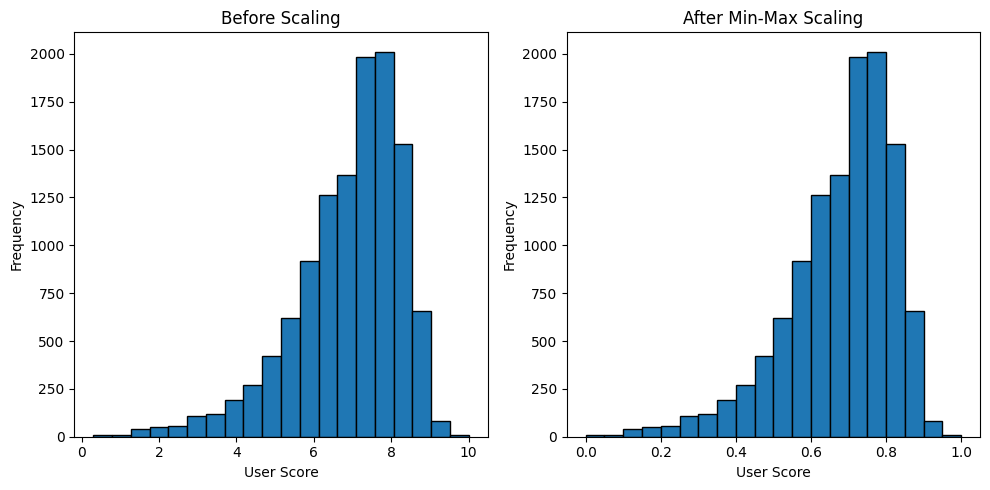

In [3]:
# 特徵縮放或特徵標準化方法

# Min-Max 縮放
def min_max_scaling(data):
    return (data - data.min()) / (data.max() - data.min())

# 繪製直方圖探討變化
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(data['User Score'].dropna(), bins=20, edgecolor='black')
plt.title('Before Scaling')
plt.xlabel('User Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(min_max_scaling(data['User Score'].dropna()), bins=20, edgecolor='black')
plt.title('After Min-Max Scaling')
plt.xlabel('User Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

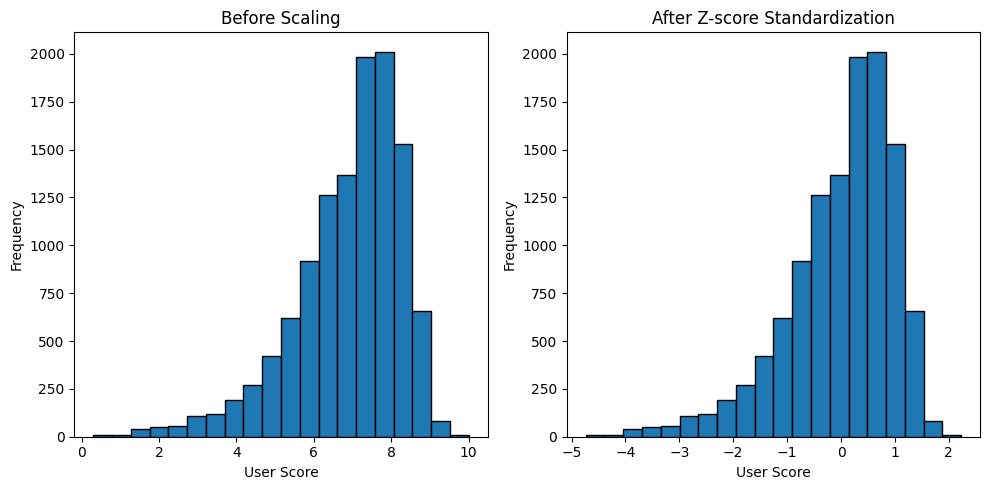

In [4]:
# Z-score 標準化
def z_score_standardization(data):
    return (data - data.mean()) / data.std()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(data['User Score'].dropna(), bins=20, edgecolor='black')
plt.title('Before Scaling')
plt.xlabel('User Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(z_score_standardization(data['User Score'].dropna()), bins=20, edgecolor='black')
plt.title('After Z-score Standardization')
plt.xlabel('User Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [5]:
# 特徵區間化

# 等寬劃分
def equal_width_binning(data, bins):
    return pd.cut(data, bins=bins, include_lowest=True, right=True)

# 使用等寬劃分，將 'User Score' 分為 5 個區間
data['User Score Equal Width'] = equal_width_binning(data['User Score'], bins=5)

# 每個類別的範圍分別為何
data['User Score Equal Width'].value_counts().sort_index()

User Score Equal Width
(0.289, 2.24]     111
(2.24, 4.18]      472
(4.18, 6.12]     2233
(6.12, 8.06]     6622
(8.06, 10.0]     2276
Name: count, dtype: int64

In [6]:
print('Before filling missing data: %d' % data['User Score'].isnull().sum())

# 使用平均值填補
data.fillna({'User Score': data['User Score'].mean()}, inplace=True)

# 使用中位數填補
data.fillna({'User Score': data['User Score'].median()}, inplace=True)

# 使用眾數填補
data.fillna({'User Score': data['User Score'].mode()[0]}, inplace=True)

# 顯示填補後的數據集
print('After filling missing data: %d' % data['User Score'].isnull().sum())

Before filling missing data: 2341
After filling missing data: 0


In [7]:
# 等頻劃分
def equal_freq_binning(data, bins):
    return pd.qcut(data, q=bins, duplicates='drop')

# 使用等頻劃分，將 'User Ratings Count' 分為 5 個區間
data['User Ratings Count Equal Frequency'] = equal_freq_binning(data['User Ratings Count'], bins=5)

data['User Ratings Count Equal Frequency'].value_counts().sort_index()

User Ratings Count Equal Frequency
(4.999, 11.0]        2319
(11.0, 23.0]         2207
(23.0, 53.0]         2286
(53.0, 154.0]        2238
(154.0, 163419.0]    2249
Name: count, dtype: int64

In [8]:
print('Before filling missing data: %d' % data['User Ratings Count'].isnull().sum()) 

# 使用平均值填補
data.fillna({'User Ratings Count': data['User Ratings Count'].mean()}, inplace=True)

# 使用中位數填補
data.fillna({'User Ratings Count': data['User Ratings Count'].median()}, inplace=True)

# 使用眾數填補
data.fillna({'User Ratings Count': data['User Ratings Count'].mode()[0]}, inplace=True)

# 顯示填補後的數據集
print('After filling missing data: %d' % data['User Ratings Count'].isnull().sum())

Before filling missing data: 2756
After filling missing data: 0
